In [1]:
!pip install numpy matplotlib scikit-learn

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
class AdaBoostClassifier:
    def __init__(self, n_estimators=50, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.weak_learners = []
        self.estimator_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]

        # Initialize weights uniformly
        sample_weights = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            # Train weak learner (Decision Tree stump)
            weak_learner = DecisionTreeClassifier(max_depth=1)
            weak_learner.fit(X, y, sample_weight=sample_weights)

            predictions = weak_learner.predict(X)

            # Calculate weighted error
            incorrect = predictions != y
            weighted_error = np.sum(sample_weights * incorrect) / np.sum(sample_weights)

            if weighted_error >= 0.5:
                continue

            estimator_weight = self.learning_rate * np.log((1 - weighted_error) / (weighted_error)) / 2

            sample_weights *= np.exp(estimator_weight * incorrect)

            sample_weights /= np.sum(sample_weights)

            self.weak_learners.append(weak_learner)
            self.estimator_weights.append(estimator_weight)

    def predict(self, X):
        predictions = np.array([
            estimator_weight * learner.predict(X)
            for learner, estimator_weight in zip(self.weak_learners, self.estimator_weights)
        ])

        # Sum weighted predictions and get sign
        ensemble_predictions = np.sign(np.sum(predictions, axis=0))
        return ensemble_predictions

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

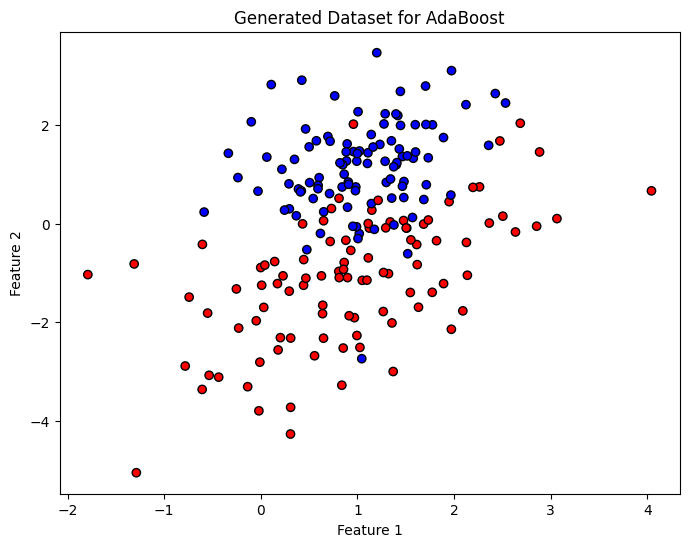

In [4]:
# Generate a random binary classification problem
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1
)

y = 2 * y - 1

# Plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Generated Dataset for AdaBoost")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# Initialize the classifier
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
adaboost.fit(X, y)

predictions = adaboost.predict(X)

accuracy = adaboost.score(X, y)
print(f"Training accuracy: {accuracy:.4f}")

Training accuracy: 0.9200


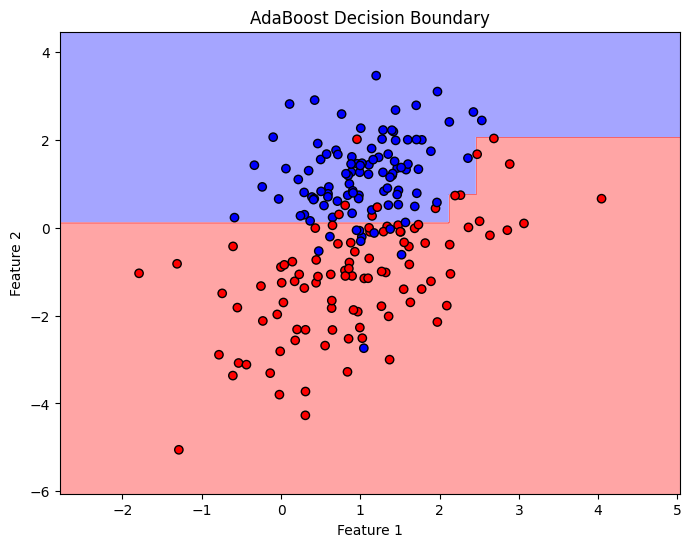

In [6]:
def plot_decision_boundary(X, y, classifier, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, adaboost, "AdaBoost Decision Boundary")